In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,Aces,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ServiceGamesPlayed,ServiceGamesWon,Wins,Losses,Earnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0,7,7,0.43,2,8,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,7,7,0,0.57,1,9,0.67,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,2,10,8,0.40,1,17,0.65,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,2,5,6,0.40,0,15,0.80,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,1,2,0,0.50,2,2,0.50,0,1,32879,272


In [3]:
df.corr()

,Year,FirstServe,FirstServePointsWon,Aces,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ServiceGamesPlayed,ServiceGamesWon,Wins,Losses,Earnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.108367,-0.101735,-0.114806,-0.006154,-0.071885,-0.108477,-0.008930,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.048149,0.057709,0.062345,0.087945,-0.005477,0.071920,0.137473,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.460323,0.301925,0.324853,0.405751,0.373321,0.376460,0.817829,0.356702,0.330581,0.361121,-0.150004
Aces,-0.108367,0.048149,0.460323,1.000000,0.757405,0.784934,0.282672,0.819031,0.866138,0.440922,0.825301,0.768628,0.798404,-0.277811
BreakPointsFaced,-0.101735,0.057709,0.301925,0.757405,1.000000,0.973352,0.271783,0.917645,0.971296,0.354012,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.784934,0.973352,1.000000,0.247996,0.906391,0.978278,0.372271,0.923453,0.909295,0.900444,-0.334548
BreakPointsSaved,-0.006154,0.087945,0.405751,0.282672,0.271783,0.247996,1.000000,0.264818,0.274677,0.518091,0.252053,0.246990,0.258271,-0.121220
DoubleFaults,-0.071885,-0.005477,0.373321,0.819031,0.917645,0.906391,0.264818,1.000000,0.925879,0.378686,0.847459,0.881922,0.854685,-0.305866
ServiceGamesPlayed,-0.108477,0.071920,0.376460,0.866138,0.971296,0.978278,0.274677,0.925879,1.000000,0.418467,0.929153,0.935182,0.912985,-0.331738
ServiceGamesWon,-0.008930,0.137473,0.817829,0.440922,0.354012,0.372271,0.518091,0.378686,0.418467,1.000000,0.385040,0.367345,0.395577,-0.198822


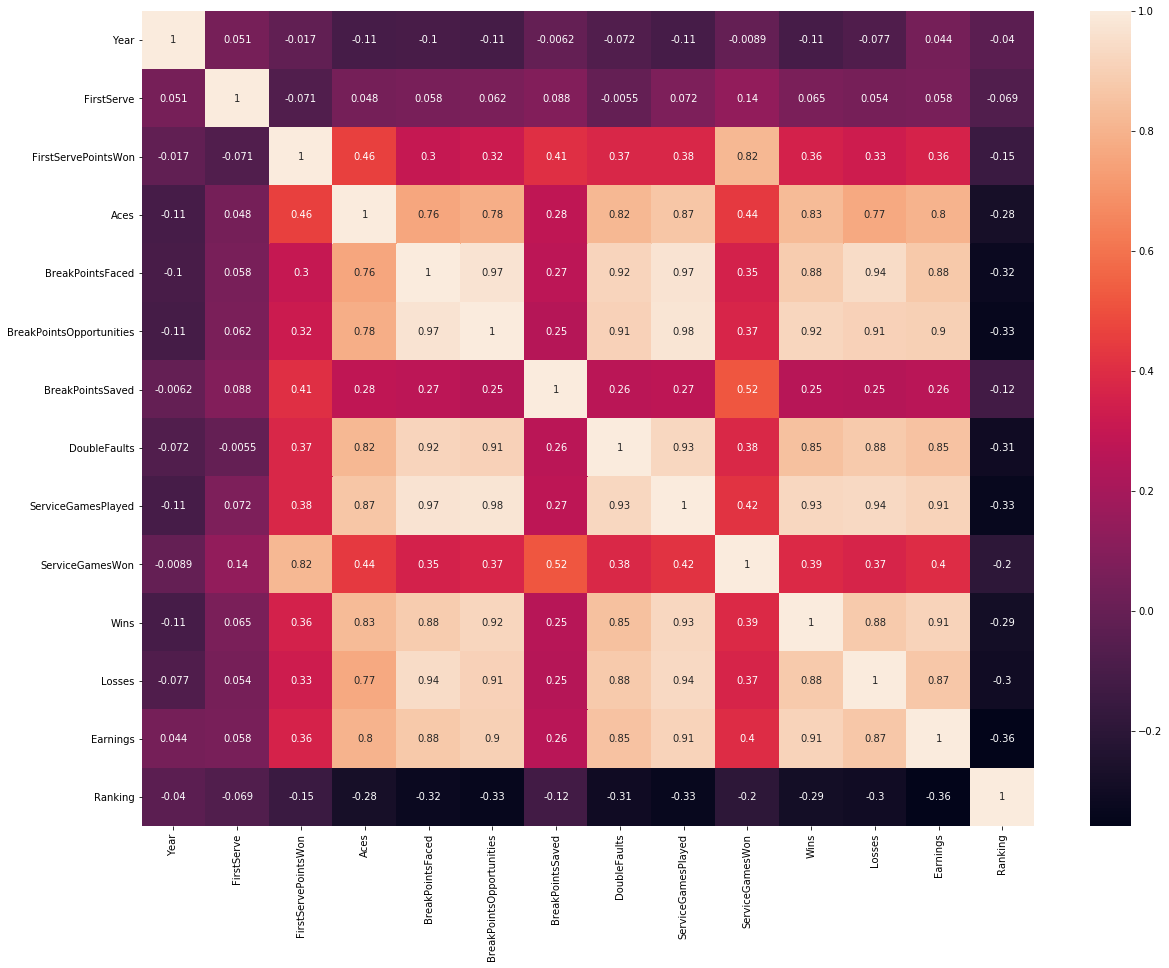

In [4]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'Earnings')

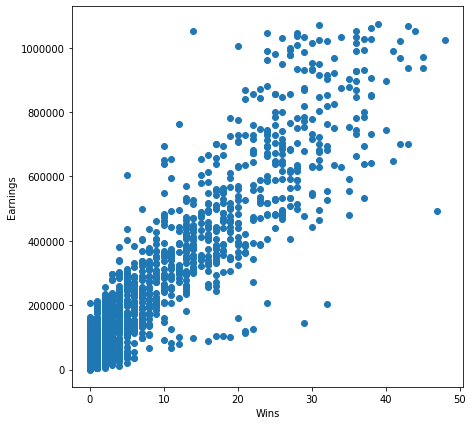

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(df['Wins'],df['Earnings'])
plt.xlabel("Wins")
plt.ylabel("Earnings")

Text(0, 0.5, 'Service Games Won')

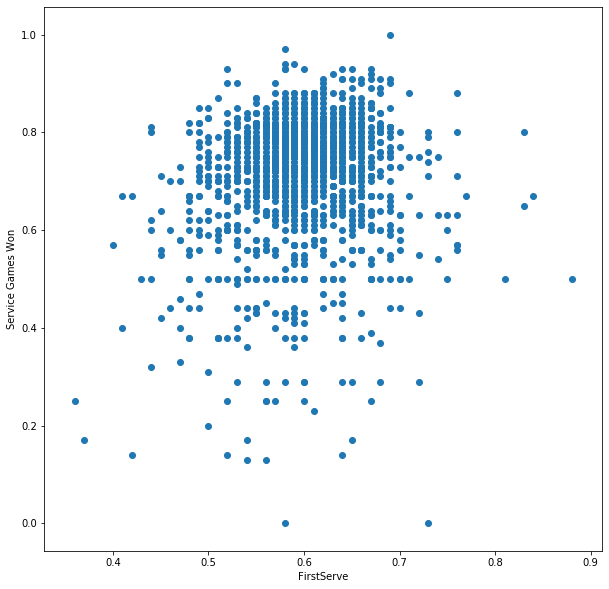

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df['FirstServe'],df['ServiceGamesWon'])
plt.xlabel("FirstServe")
plt.ylabel("Service Games Won")

In [7]:
model = LinearRegression()
x = df[['BreakPointsOpportunities','DoubleFaults','Wins','Losses','ServiceGamesPlayed','BreakPointsFaced']]
y = df[['Earnings']]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.score(x_test,y_test)

0.8855241797107207